<a href="https://colab.research.google.com/github/JessiPool/KaggleXProject/blob/exploratory/AffordableHousingMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload

import numpy as np
import matplotlib.pyplot as plt

from google.colab import auth
auth.authenticate_user()


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
inventory = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/SampleInventorySales10yr.csv')

In [5]:
rental = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/SampleRentals20142020.csv')

In [6]:
cpi = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/consumerpriceindex10yr.csv')

In [7]:
dow = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/dow10yr.csv')

In [8]:
gdp = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/gdp10yr.csv')

In [9]:
healthcare = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/healthcare10yr.csv')

In [10]:
studentaid = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/studentaid10yr.csv')

In [11]:
medianhh = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/medianHH.csv')

In [12]:
modinventory = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/SampleInventorySales10yrmod.csv')

In [13]:
rentalmod = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/SampleRentals20142020mod.csv')

In [ ]:
print(inventory.head())

         value state  year_only
0  $147,588.00    AL       2011
1  $145,830.00    AL       2011
2  $167,000.00    AL       2011
3  $163,500.00    AL       2011
4   $92,000.00    AL       2011


In [30]:
# Calculate the maximum and minimum values in the "value" column
max_value = modinventory['value'].max()
min_value = modinventory['value'].min()

print("Maximum value:", max_value)
print("Minimum value:", min_value)

Maximum value: 2148000.0
Minimum value: 5002.0


<Axes: >

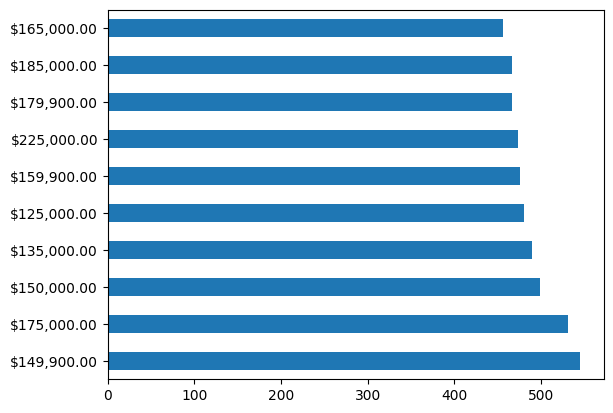

In [ ]:
inventory.value.value_counts().head(10).plot.barh()

<Axes: >

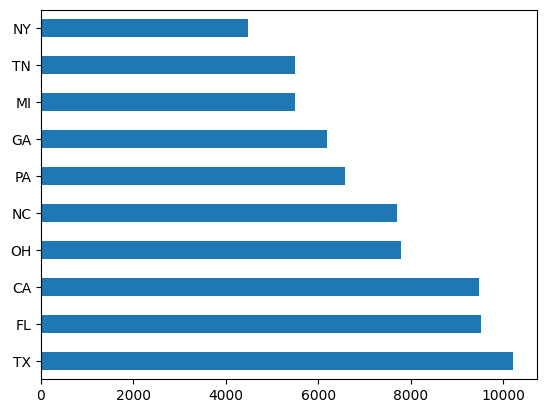

In [ ]:
inventory.state.value_counts().head(10).plot.barh()

<Axes: >

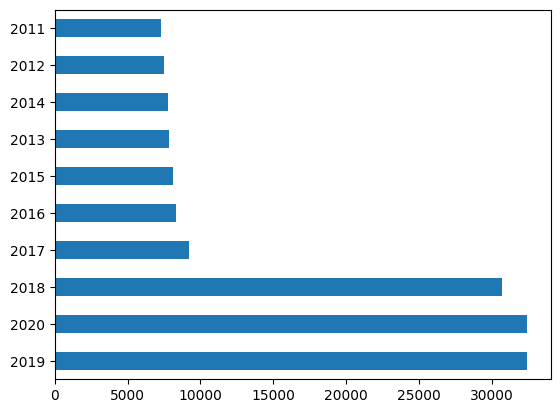

In [ ]:
inventory.year_only.value_counts().head(10).plot.barh()

In [ ]:
print(rental.head())

       value state  year_only
0  $1,241.00    AL       2014
1    $951.00    AL       2014
2    $803.00    AL       2014
3    $811.00    AL       2014
4  $1,588.00    AL       2014


<Axes: >

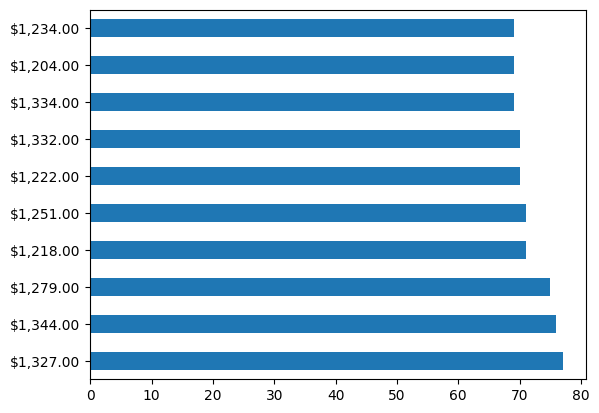

In [ ]:
rental.value.value_counts().head(10).plot.barh()

<Axes: >

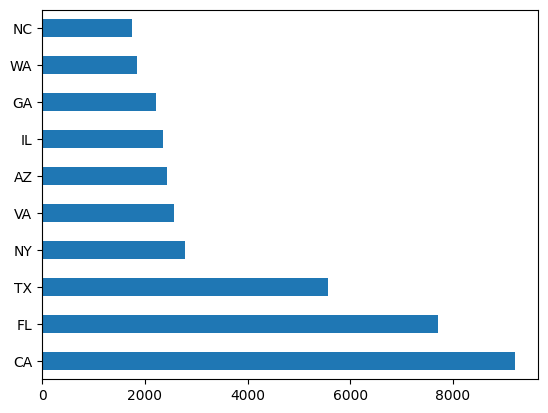

In [ ]:
rental.state.value_counts().head(10).plot.barh()

<Axes: >

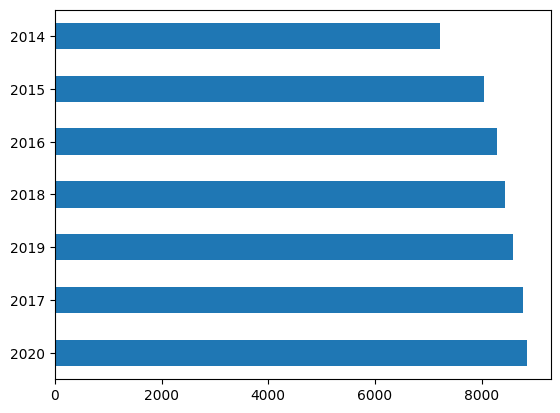

In [ ]:
rental.year_only.value_counts().head(10).plot.barh()

In [ ]:
print(medianhh.head())

   median_household_income state  year_only
0                    91960    AK       2017
1                    50870    AL       2017
2                    58660    AR       2017
3                    70390    AZ       2017
4                    82580    CA       2017


<Axes: >

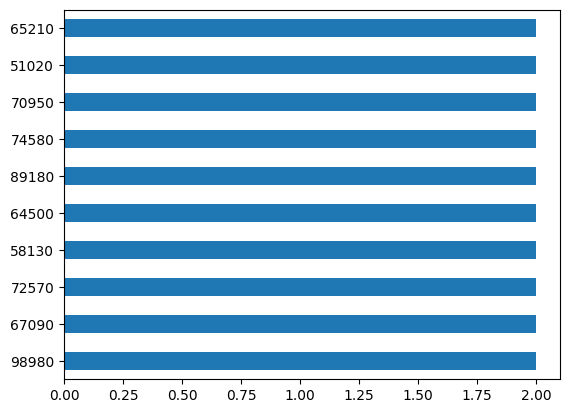

In [ ]:
medianhh.median_household_income.value_counts().head(10).plot.barh()

<Axes: >

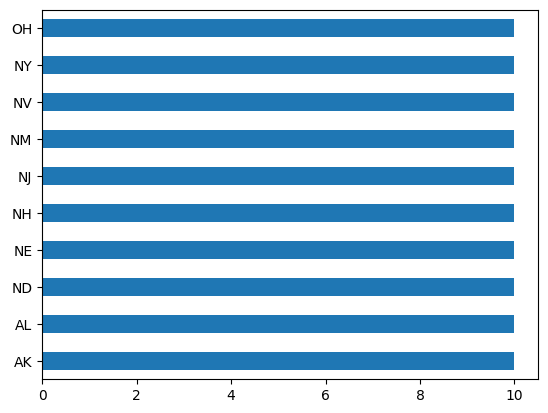

In [ ]:
medianhh.state.value_counts().head(10).plot.barh()

<Axes: >

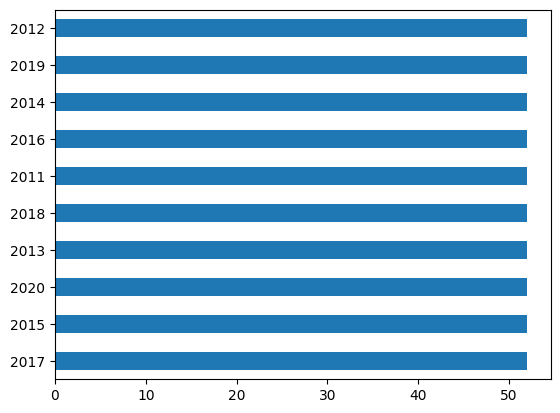

In [ ]:
medianhh.year_only.value_counts().head(10).plot.barh()

        date      CPI
0  10/1/2011  226.750
1  11/1/2019  257.803
2   7/1/2018  251.214
3   3/1/2017  243.892
4  12/1/2018  252.767


<Axes: >

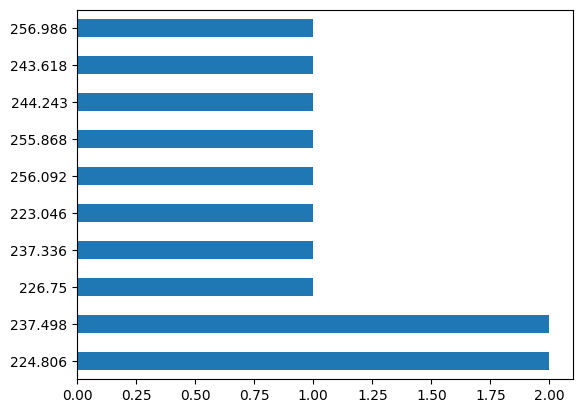

In [ ]:
print(cpi.head())
cpi.CPI.value_counts().head(10).plot.barh()

       date  stock_market_closing_value  change_in_value
0  1/3/2011                    11670.75            93.24
1  1/4/2011                    11691.18            20.43
2  1/5/2011                    11722.89            31.71
3  1/6/2011                    11697.31           -25.58
4  1/7/2011                    11674.76           -22.55


<Axes: >

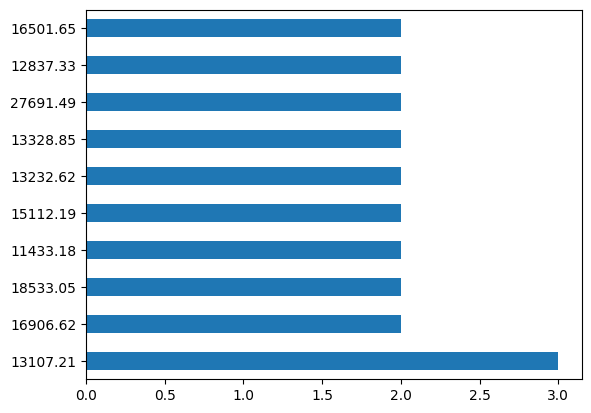

In [ ]:
print(dow.head())
dow.date.value_counts().head(10).plot.barh()
dow.stock_market_closing_value.value_counts().head(10).plot.barh()

  GDP_by_billion_USD Per_Capita_USD  Annual_Percentage_Growth_Change  \
0         $15,599.73     $50,065.97                           1.5499   
1         $16,253.97     $51,784.42                           2.2807   
2         $16,843.19     $53,291.13                           1.8419   
3         $17,550.68     $55,123.85                           2.2878   
4         $18,206.02     $56,762.73                           2.7064   

   year_only  
0       2011  
1       2012  
2       2013  
3       2014  
4       2015  


<Axes: >

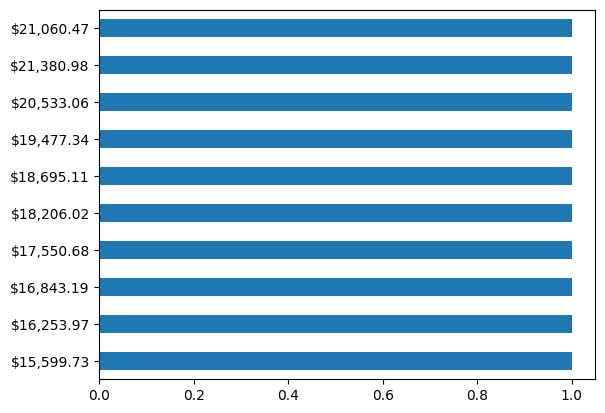

In [ ]:
print(gdp.head())
gdp.GDP_by_billion_USD.value_counts().head(10).plot.barh()


<Axes: >

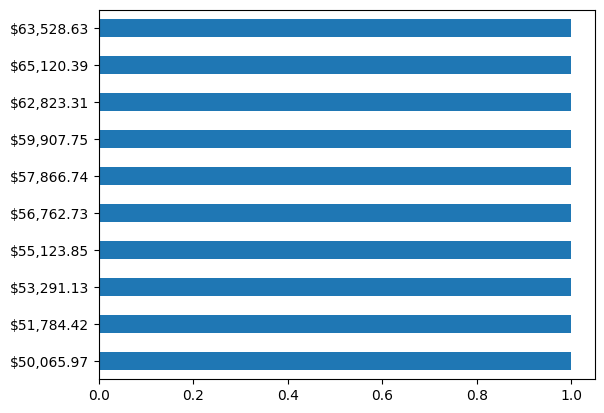

In [ ]:
gdp.Per_Capita_USD.value_counts().head(10).plot.barh()


<Axes: >

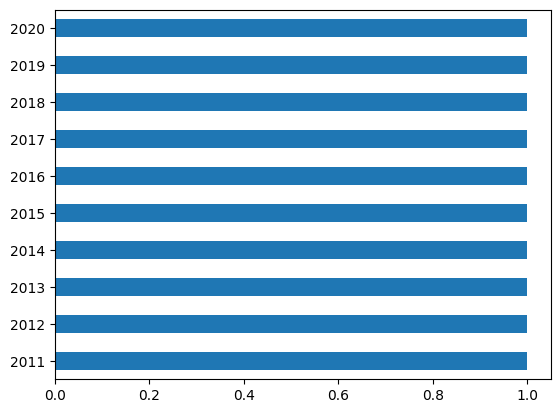

In [ ]:
gdp.year_only.value_counts().head(10).plot.barh()

  Total_in_Billions_USD Out_of_Pocket_in_Billions_USD  \
0             $2,253.90                       $310.20   
1             $2,346.20                       $323.20   
2             $2,405.20                       $331.00   
3             $2,527.10                       $340.80   
4             $2,674.30                       $353.50   

  Health_Insurance_in_Billions_USD Private_Health_Insurance_in_Billions_USD  \
0                        $1,732.70                                  $752.50   
1                        $1,797.80                                  $778.70   
2                        $1,840.00                                  $779.90   
3                        $1,948.80                                  $815.50   
4                        $2,076.10                                  $870.20   

  Medicare_in_Billions_USD Medicaid_in_Billions_USD  \
0                  $511.80                  $373.70   
1                  $533.60                  $388.30   
2                

<Axes: >

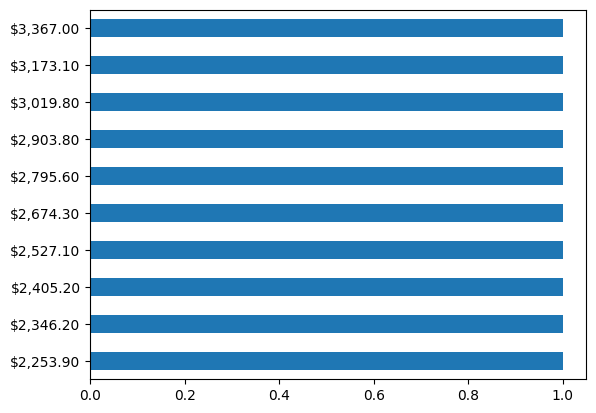

In [ ]:
print(healthcare.head())
healthcare.Total_in_Billions_USD.value_counts().head(10).plot.barh()


<Axes: >

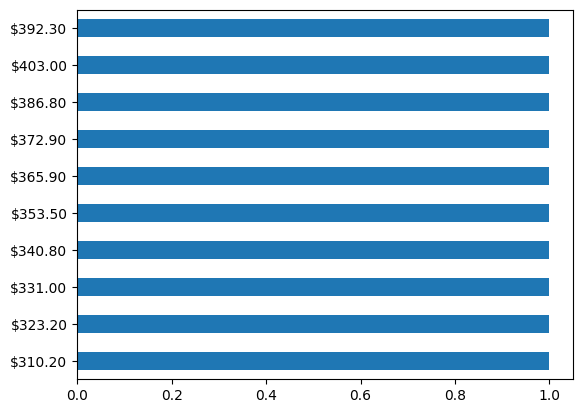

In [ ]:
healthcare.Out_of_Pocket_in_Billions_USD.value_counts().head(10).plot.barh()


<Axes: >

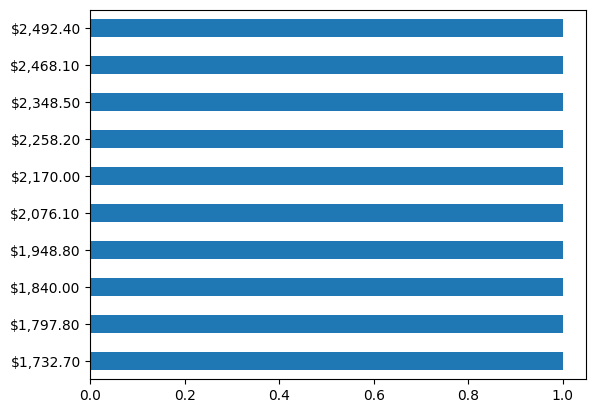

In [ ]:
healthcare.Health_Insurance_in_Billions_USD.value_counts().head(10).plot.barh()


<Axes: >

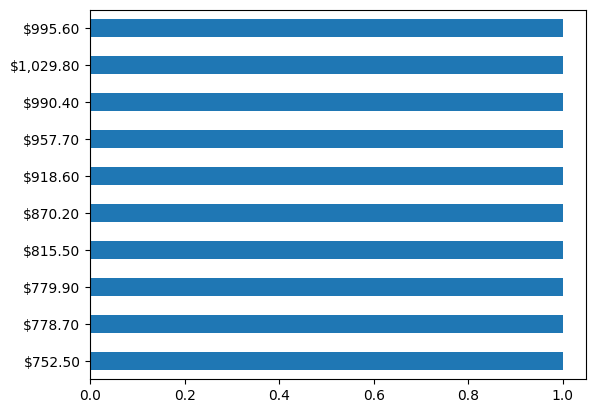

In [ ]:
healthcare.Private_Health_Insurance_in_Billions_USD.value_counts().head(10).plot.barh()


<Axes: >

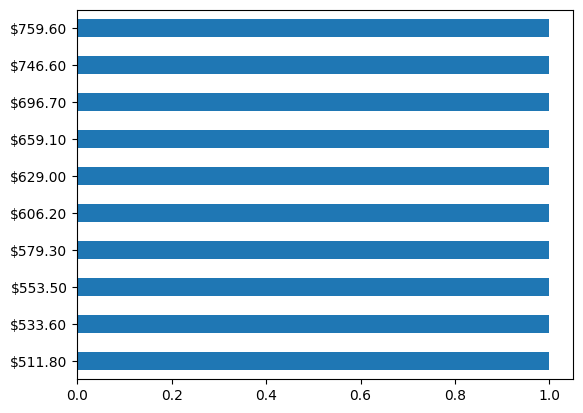

In [ ]:
healthcare.Medicare_in_Billions_USD.value_counts().head(10).plot.barh()


<Axes: >

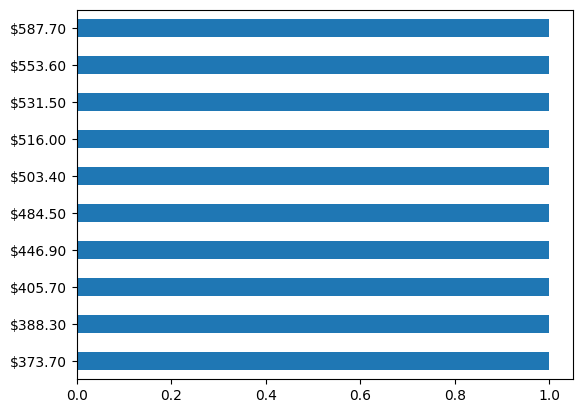

In [ ]:
healthcare.Medicaid_in_Billions_USD.value_counts().head(10).plot.barh()



<Axes: >

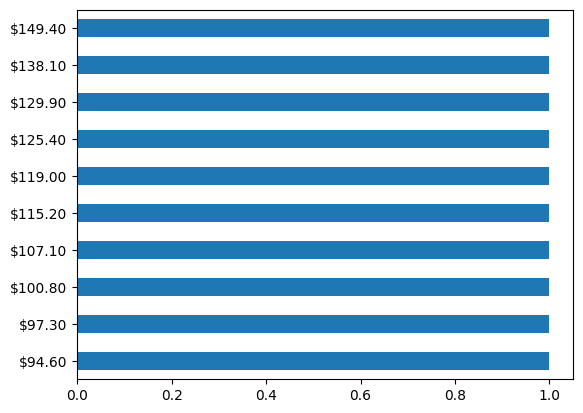

In [ ]:
healthcare.Other_Health_Insurance_Programs_in_Billions_USD.value_counts().head(10).plot.barh()


<Axes: >

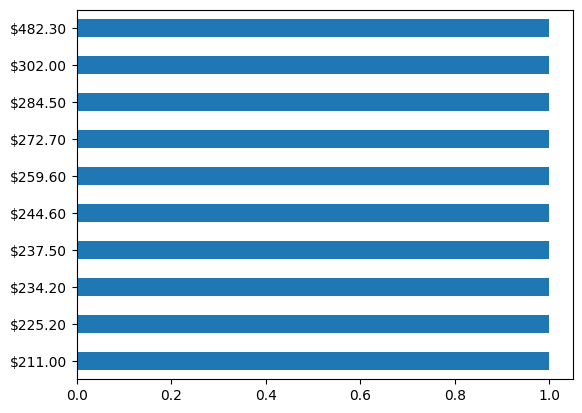

In [ ]:
healthcare.Other_Third_Party_Payers_in_Billions_USD.value_counts().head(10).plot.barh()


<Axes: >

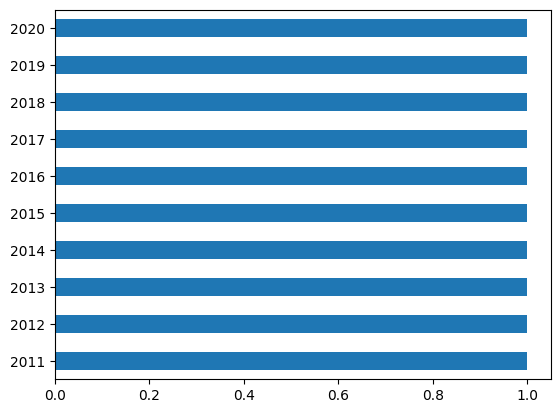

In [ ]:
healthcare.year_only.value_counts().head(10).plot.barh()

  Total_Federal_Grants_in_Millions Total_Federal_Loans_in_Millions  \
0                       $58,792.00                     $131,971.00   
1                       $53,444.00                     $128,940.00   
2                       $52,474.00                     $121,243.00   
3                       $51,430.00                     $117,865.00   
4                       $50,036.00                     $111,734.00   

  Federal_Work_Study_in_Millions Education_Tax_Benefits_in_Millions  \
0                      $1,211.00                         $26,690.00   
1                      $1,171.00                         $24,300.00   
2                      $1,139.00                         $21,740.00   
3                      $1,141.00                         $21,480.00   
4                      $1,123.00                         $20,630.00   

  TOTAL_FEDERAL__STATE___INSTITUTIONAL__AND_OTHER_AID_in_Millions  \
0                                        $294,285.00                
1             

<Axes: >

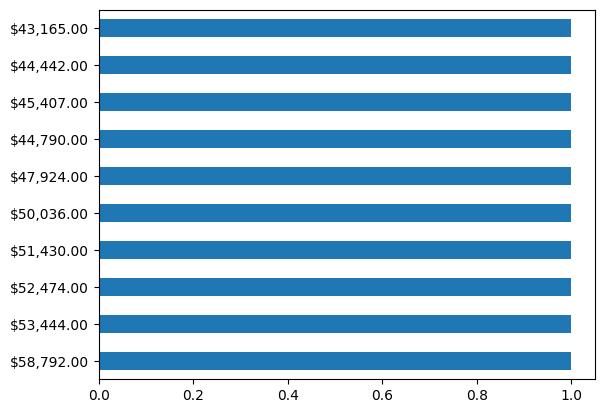

In [ ]:
print(studentaid.head())
studentaid.Total_Federal_Grants_in_Millions.value_counts().head(10).plot.barh()


<Axes: >

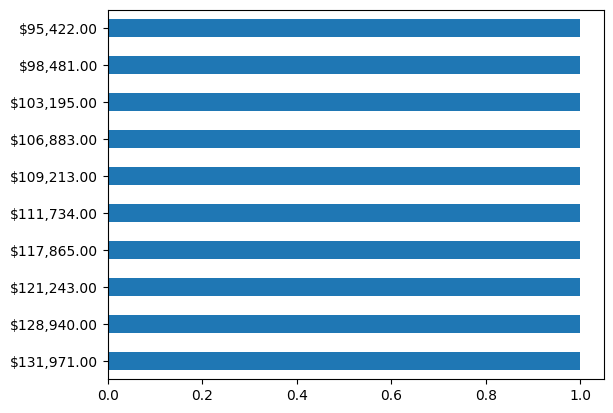

In [ ]:
studentaid.Total_Federal_Loans_in_Millions.value_counts().head(10).plot.barh()

<Axes: >

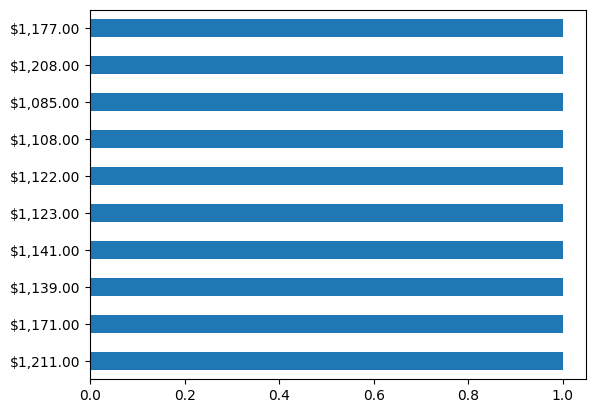

In [ ]:
studentaid.Federal_Work_Study_in_Millions.value_counts().head(10).plot.barh()


<Axes: >

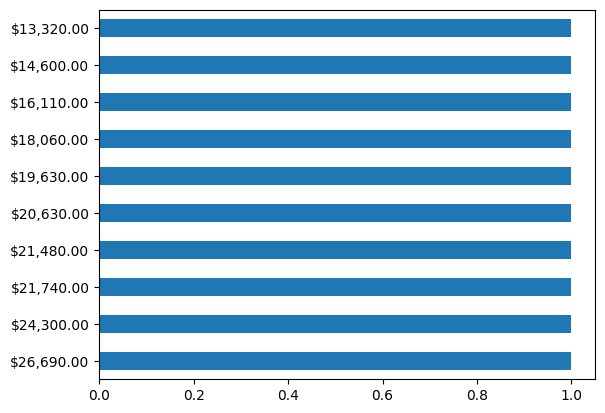

In [ ]:
studentaid.Education_Tax_Benefits_in_Millions.value_counts().head(10).plot.barh()


<Axes: >

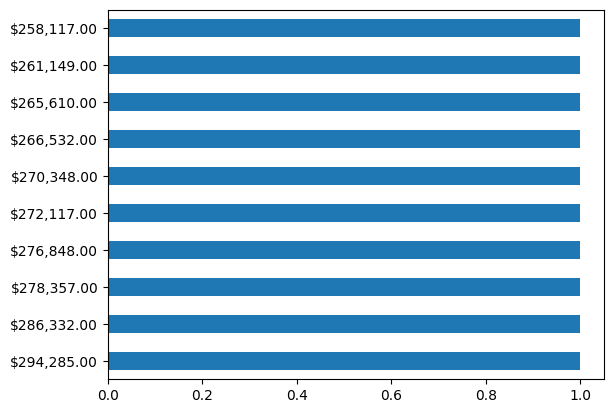

In [ ]:
studentaid.TOTAL_FEDERAL__STATE___INSTITUTIONAL__AND_OTHER_AID_in_Millions.value_counts().head(10).plot.barh()


<Axes: >

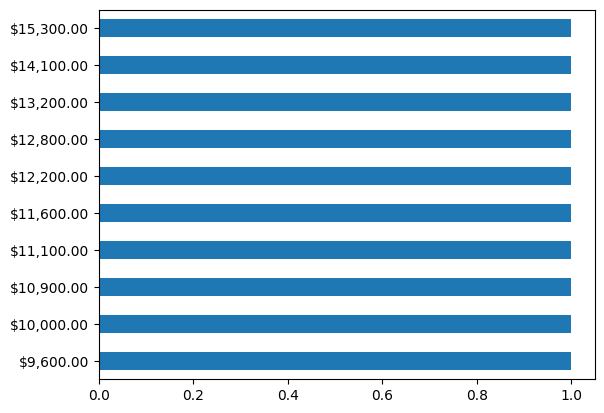

In [ ]:
studentaid.NONFEDERAL_LOANS_in_Millions.value_counts().head(10).plot.barh()


<Axes: >

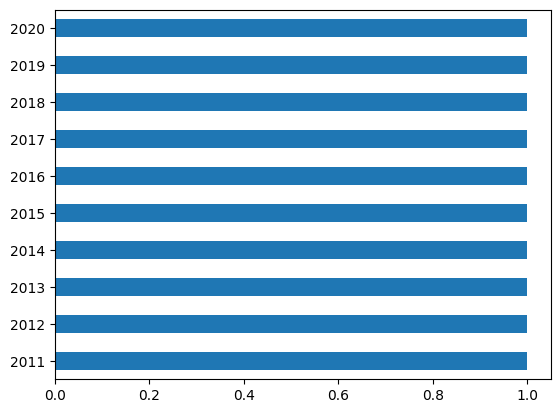

In [ ]:
studentaid.year_only.value_counts().head(10).plot.barh()

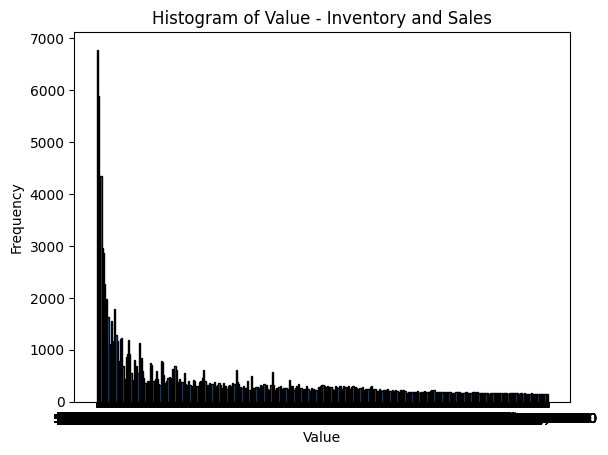

In [ ]:
valueinv = inventory['value']

# Create a histogram of Zillow Inventory and Sales
plt.hist(valueinv, bins=390, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value - Inventory and Sales')
plt.show()

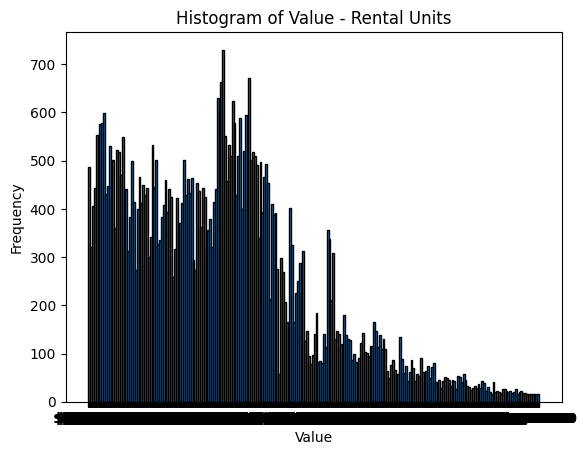

In [ ]:
valuerent = rental['value']

# Create a histogram of Zillow Rentals
plt.hist(valuerent, bins=242, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value - Rental Units')
plt.show()

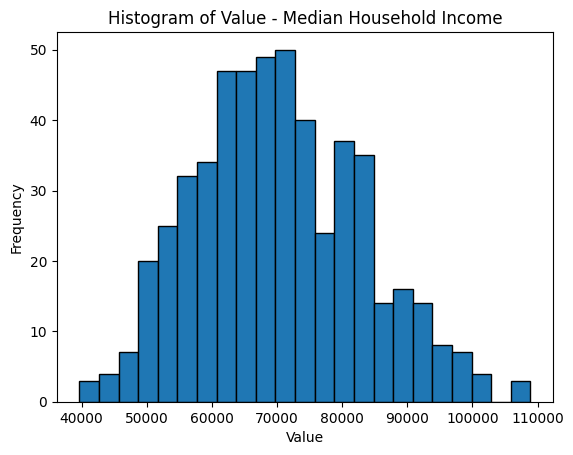

In [ ]:
mhhi = medianhh['median_household_income']

# Create a histogram of Zillow Rentals
plt.hist(mhhi, bins=23, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Value - Median Household Income')
plt.show()

In [ ]:
# CORRECT ATTEMPT - Creating the table for affordability by Median Household Income Rentals by state

In [ ]:
# Step 1: Merge the datasets based on state and year
merged_data = pd.merge(rentalmod, medianhh, on=['state', 'year_only'])

In [ ]:
# Step 2: Calculate the affordability percentage
merged_data['affordability_percentage'] = (merged_data['value'] / (merged_data['median_household_income'] / 12)) * 100

In [ ]:
# Step 3: Filter and calculate affordability for each year (2014 to 2020)
years = list(range(2014, 2021))

# Create an empty list to store the results
result_data = []

for year in years:
    # Filter data for the current year
    year_data = merged_data[merged_data['year_only'] == year].copy()  # Ensure a copy of the DataFrame

    # Calculate affordability for each state in the current year
    year_data.loc[:, 'affordability'] = year_data['affordability_percentage'] <= 30  # Use .loc to modify

    # Calculate the median household income for each state in the current year
    median_income = year_data.groupby('state')['median_household_income'].median().reset_index()

    # Merge the results and append to the result_data list
    merged_year_data = pd.merge(year_data, median_income, on='state')
    result_data.append(merged_year_data)


In [ ]:
# Step 4: Create a pandas DataFrame to organize the data
final_result = pd.concat(result_data)

# Export the table to CSV
output_path = '/content/drive/MyDrive/Data/KaggleX/pythondata/affordabilityrental3.csv'

In [ ]:
# Step 5: Export the DataFrame to a CSV file
final_result.to_csv(output_path, index=False)

In [33]:
affordabilityrental3 = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/affordabilityrental3.csv')

In [ ]:
print(affordabilityrental3.head())

    value state  year_only  median_household_income_x  \
0  1241.0    AL       2014                      42280   
1   951.0    AL       2014                      42280   
2   803.0    AL       2014                      42280   
3   811.0    AL       2014                      42280   
4  1588.0    AL       2014                      42280   

   affordability_percentage  affordability  median_household_income_y  
0                 35.222327          False                    42280.0  
1                 26.991485           True                    42280.0  
2                 22.790918           True                    42280.0  
3                 23.017975           True                    42280.0  
4                 45.070956          False                    42280.0  


<Axes: >

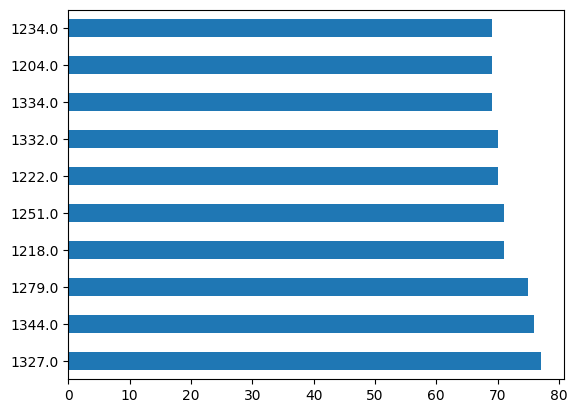

In [ ]:
affordabilityrental3.value.value_counts().head(10).plot.barh()


<Axes: >

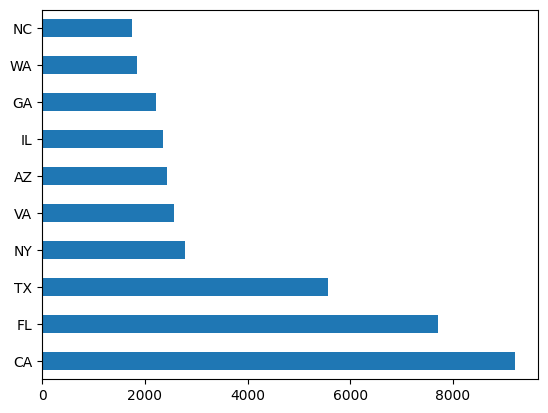

In [16]:
affordabilityrental3.state.value_counts().head(10).plot.barh()


<Axes: >

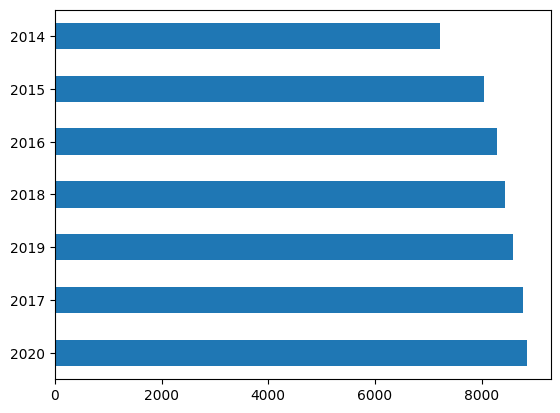

In [ ]:
affordabilityrental3.year_only.value_counts().head(10).plot.barh()


<Axes: >

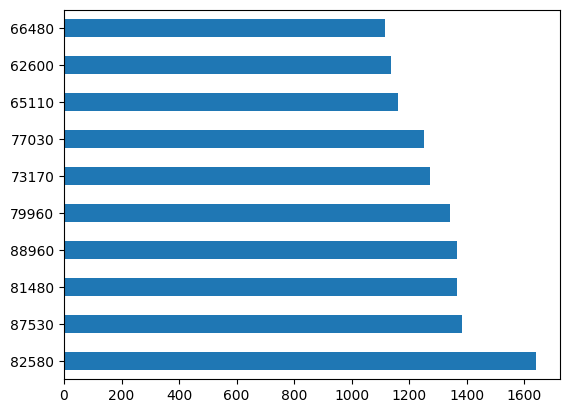

In [ ]:
affordabilityrental3.median_household_income_x.value_counts().head(10).plot.barh()


<Axes: >

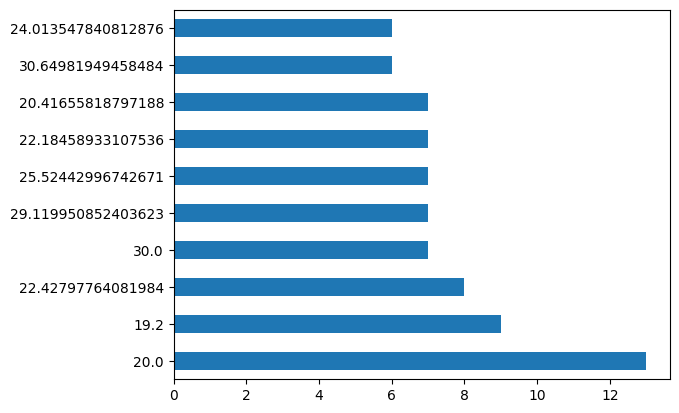

In [ ]:
affordabilityrental3.affordability_percentage.value_counts().head(10).plot.barh()


<Axes: >

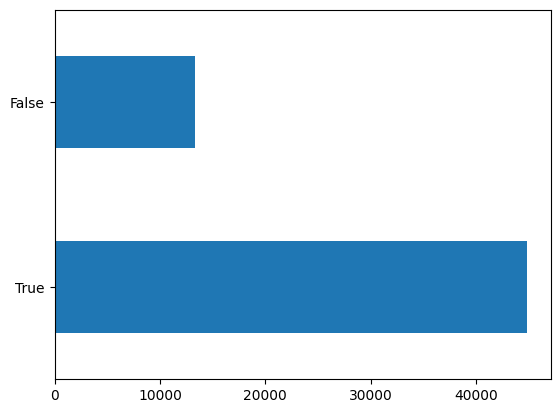

In [ ]:
affordabilityrental3.affordability.value_counts().head(10).plot.barh()

In [ ]:
result_df = affordabilityrental3.groupby(['state', 'year_only'])['affordability'].mean().reset_index()
result_df['percentage'] = result_df['affordability'] * 100
result_df.drop('affordability', axis=1, inplace=True)

result_df.to_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/affordability_percentage.csv', index=False)

In [17]:
staterent_afford_pct = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/affordability_pct_rental_state.csv')

In [18]:
usmedianhh = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/usmedianhh.csv')

In [37]:
print(usmedianhh.head())

   median_household_income state  year_only
0                    61140    US       2017
1                    56520    US       2015
2                    68010    US       2020
3                    53590    US       2013
4                    63180    US       2018


In [ ]:
# CORRECT ATTEMPT - Create Median Household Income dataset with US only values

# Step 1: Merge the datasets based on state and year
merged_data = pd.merge(rentalmod, usmedianhh, on=['year_only'])

In [ ]:
# Step 2: Calculate the affordability percentage
merged_data['affordability_percentage'] = (merged_data['value'] / (merged_data['median_household_income'] / 12)) * 100

In [ ]:
# Step 3: Filter and calculate affordability for each year (2014 to 2020)
years = list(range(2014, 2021))

# Create an empty list to store the results
result_data = []

for year in years:
    # Filter data for the current year
    year_data = merged_data[merged_data['year_only'] == year].copy()  # Ensure a copy of the DataFrame

    # Calculate affordability for the current year
    year_data.loc[:, 'affordability'] = year_data['affordability_percentage'] <= 30  # Use .loc to modify

    # Calculate the median household income for the current year
    median_income = year_data['median_household_income'].median()

    # Assign the median income for the current year to all rows in year_data
    year_data['median_household_income'] = median_income

    # Append the modified year_data to the result_data list
    result_data.append(year_data)

In [ ]:
# Step 4: Create a pandas DataFrame to organize the data
final_result = pd.concat(result_data)

# Export the table to CSV
output_path = '/content/drive/MyDrive/Data/KaggleX/pythondata/usaffordabilityrent.csv'

In [ ]:
# Step 5: Export the DataFrame to a CSV file
final_result.to_csv(output_path, index=False)

In [19]:
usaffordabilityrent = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/usaffordabilityrent.csv')

In [ ]:
print(usaffordabilityrent.head())

    value state_x  year_only  median_household_income state_y  \
0  1241.0      AL       2014                  53660.0      US   
1   951.0      AL       2014                  53660.0      US   
2   803.0      AL       2014                  53660.0      US   
3   811.0      AL       2014                  53660.0      US   
4  1588.0      AL       2014                  53660.0      US   

   affordability_percentage  affordability  
0                 27.752516           True  
1                 21.267238           True  
2                 17.957510           True  
3                 18.136414           True  
4                 35.512486          False  


In [ ]:
result_df = usaffordabilityrent.groupby(['year_only'])['affordability'].mean().reset_index()
result_df['percentage'] = result_df['affordability'] * 100
result_df.drop('affordability', axis=1, inplace=True)

In [ ]:
result_df.to_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/us_affordability_percentage.csv', index=False)

In [20]:
usaffordpctrent = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/us_affordability_pct_rent.csv')

In [21]:
print(usaffordpctrent.head())

   year_only  percentage
0       2014   57.698160
1       2015   57.688005
2       2016   57.622209
3       2017   57.532216
4       2018   57.570735


In [ ]:
# Inventory and Sales - Affordability of monthly payment by state

In [35]:
# Define the formula for calculating monthly mortgage payment
def calculate_monthly_mortgage(value):
    return (value + (value * 0.0778) + ((value + (value * 0.0778)) * 0.039)) / 360

# Apply the calculation and create a new column 'monthly_mortgage_payment'
modinventory['monthly_mortgage_payment'] = modinventory['value'].apply(calculate_monthly_mortgage)

# Print the updated DataFrame
print(modinventory)

            value state  year_only  monthly_mortgage_payment
0        147588.0    AL       2011                459.094694
1        145830.0    AL       2011                453.626171
2        167000.0    AL       2011                519.478643
3        163500.0    AL       2011                508.591366
4         92000.0    AL       2011                286.179851
...           ...   ...        ...                       ...
151644   330067.0    WY       2020               1026.723097
151645  1186875.0    WY       2020               3691.953378
151646   243500.0    WY       2020                757.443410
151647   281120.0    WY       2020                874.466084
151648  1095000.0    WY       2020               3406.162358

[151649 rows x 4 columns]


In [36]:
# Save the updated dataset to a new CSV file
modinventory.to_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/modinventory_with_mortgage.csv', index=False)


In [40]:
modinventory_mort = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/modinventory_with_mortgage.csv')

In [38]:
# Define the formula for calculating housing budget by state (can be used for both inventory & sales and rentals)

# Calculate the monthly housing budget based on the provided formula
medianhh['monthly housing budget'] = (medianhh['median_household_income'] / 12) * 0.28

# Display the updated DataFrame
print(medianhh)

     median_household_income state  year_only  monthly housing budget
0                      91960    AK       2017             2145.733333
1                      50870    AL       2017             1186.966667
2                      58660    AR       2017             1368.733333
3                      70390    AZ       2017             1642.433333
4                      82580    CA       2017             1926.866667
..                       ...   ...        ...                     ...
515                    69010    VT       2012             1610.233333
516                    77220    WA       2012             1801.800000
517                    65910    WI       2012             1537.900000
518                    54080    WV       2012             1261.866667
519                    71410    WY       2012             1666.233333

[520 rows x 4 columns]


In [39]:
# Save the updated dataset to a new CSV file
medianhh.to_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/medianhh_budget.csv', index=False)


In [41]:
medianhh_budget = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/medianhh_budget.csv')

In [42]:
# Define the formula for calculating housing budget nationally (US) (can be used for both inventory & sales and rentals)

# Calculate the monthly housing budget based on the provided formula
usmedianhh['monthly housing budget'] = (usmedianhh['median_household_income'] / 12) * 0.28

# Display the updated DataFrame
print(usmedianhh)

   median_household_income state  year_only  monthly housing budget
0                    61140    US       2017             1426.600000
1                    56520    US       2015             1318.800000
2                    68010    US       2020             1586.900000
3                    53590    US       2013             1250.433333
4                    63180    US       2018             1474.200000
5                    50050    US       2011             1167.833333
6                    59040    US       2016             1377.600000
7                    53660    US       2014             1252.066667
8                    68700    US       2019             1603.000000
9                    51020    US       2012             1190.466667


In [45]:
# Save the updated dataset to a new CSV file
usmedianhh.to_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/usmedianhh_budget.csv', index=False)


In [46]:
usmedianhh_budget = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/usmedianhh_budget.csv')

In [ ]:
# Transform consumer price index dataset (cpi) so that we have yearly average cpi

In [65]:
# Extract year from the 'date' column
cpi['year_only'] = pd.to_datetime(cpi['date']).dt.year

In [67]:
# Calculate average CPI for each year
cpi_yearlyavg = cpi.groupby('year_only')['CPI'].mean().reset_index()

# Rename the columns
cpi_yearlyavg.columns = ['year_only', 'average_CPI']

In [68]:
output_path = '/content/drive/MyDrive/Data/KaggleX/pythondata/cpi_yearlyavg.csv'

cpi_yearlyavg.to_csv(output_path, index=False)

In [69]:
cpi_yearlyavg = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/cpi_yearlyavg.csv')

In [70]:
print(cpi_yearlyavg.head())

   year_only  average_CPI
0       2011   224.923000
1       2012   229.586083
2       2013   232.951750
3       2014   236.715000
4       2015   237.001750
